## Visualization 1 
- dataset 1 
- compare AUC score from default hyperparameter and best AUC score from each HPO method
- compare execution time from default hyperparameter and from each HPO method
- do this to each GBDT model

In [1]:
import services.data_viz as dataviz
import result_ready as result

### xgboost 

In [2]:
no_hpo=result.exp_1.auc_score
gs=result.exp_2.auc_best_score
rs=result.exp_3.auc_best_score_mean
bs=result.exp_4.auc_best_score_mean
bohb=result.exp_5.auc_best_score_mean # artificial, belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]

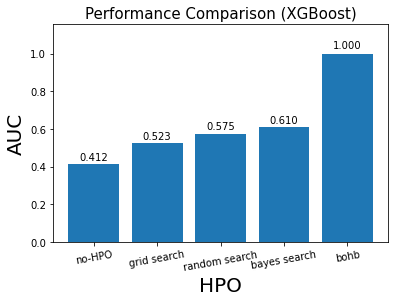

In [3]:
dataviz.bar_chart(x,y,"HPO","AUC","Performance Comparison (XGBoost)",'%.3f',[1.03,1.02,1.02,1.02,1.02],True)

In [4]:
gs=result.exp_2.exec_time
rs=result.exp_3.exec_time_mean
bs=result.exp_4.exec_time_mean
bohb=result.exp_5.exec_time_mean # artificial, belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]

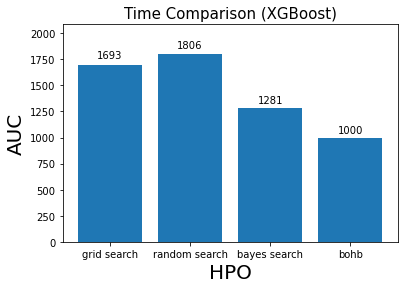

In [5]:
dataviz.bar_chart(x,y_time,"HPO","AUC","Time Comparison (XGBoost)",'%.0f',[1.03,1.02,1.02,1.02])

### lightgbm

In [6]:
no_hpo=result.exp_6.auc_score
gs=result.exp_7.auc_best_score
rs=result.exp_8.auc_best_score_mean
bs=result.exp_9.auc_best_score_mean
bohb=result.exp_10.auc_best_score_mean # artificial, belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]

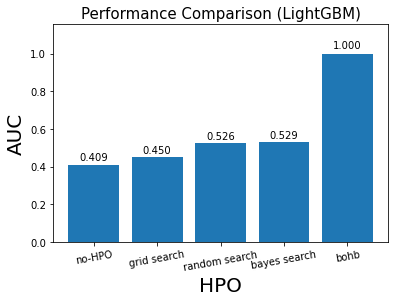

In [7]:
dataviz.bar_chart(x,y,"HPO","AUC","Performance Comparison (LightGBM)",'%.3f',[1.03,1.02,1.02,1.02,1.02],True)

In [8]:
gs=result.exp_7.exec_time
rs=result.exp_8.exec_time_mean
bs=result.exp_9.exec_time_mean
bohb=result.exp_10.exec_time_mean # artificial, belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]

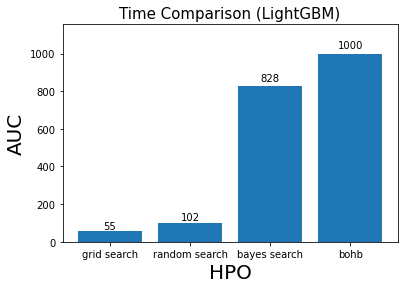

In [9]:
dataviz.bar_chart(x,y_time,"HPO","AUC","Time Comparison (LightGBM)",'%.0f',[1.03,1.02,1.02,1.02])

### catboost

In [10]:
no_hpo=result.exp_11.auc_score
gs=result.exp_12.auc_best_score
rs=result.exp_13.auc_best_score_mean
bs=result.exp_14.auc_best_score_mean
bohb=result.exp_15.auc_best_score_mean # artificial, belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]

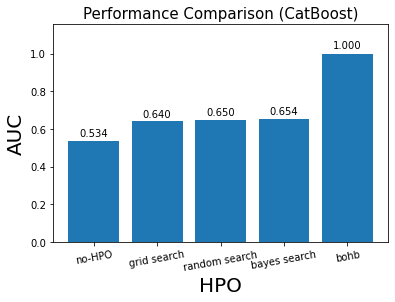

In [11]:
dataviz.bar_chart(x,y,"HPO","AUC","Performance Comparison (CatBoost)",'%.3f',[1.03,1.02,1.02,1.02,1.02],True)

In [14]:
gs=result.exp_12.exec_time
rs=result.exp_13.exec_time_mean
bs=result.exp_14.exec_time_mean
bohb=result.exp_15.exec_time_mean # artificial, belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]

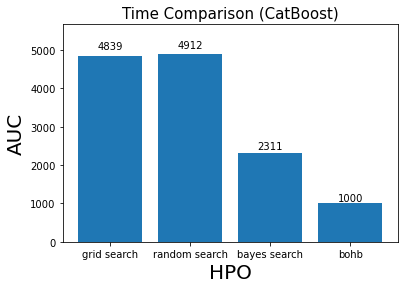

In [15]:
dataviz.bar_chart(x,y_time,"HPO","AUC","Time Comparison (CatBoost)",'%.0f',[1.03,1.02,1.02,1.02])

## Visualization 2
- dataset 1 
- compare AUC score and execution time from each GBDT using default hyperparameter

In [12]:
x = ["xgboost","lightgbm","catboost"]
y_auc=[result.exp_1.auc_score,result.exp_6.auc_score,result.exp_11.auc_score_2]
y_time=[result.exp_1.exec_time_mean,result.exp_6.exec_time_mean,result.exp_11.exec_time_mean_2]

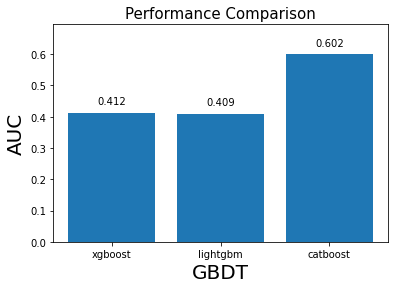

In [13]:
dataviz.bar_chart(x,y_auc,"GBDT","AUC","Performance Comparison",'%.3f',[1.05,1.05,1.03])

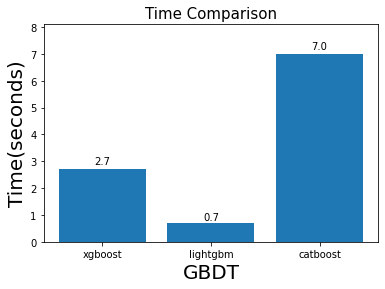

In [14]:
dataviz.bar_chart(x,y_time,"GBDT","Time(seconds)","Time Comparison",'%.1f',[1.05,1.05,1.01])

## Visualization 3
- dataset 1 
- see the pattern of grid search in each GBDT


In [15]:
x=range(1,200+1)
# [xgboost, lightgbm, catboost]
best_indexes=[result.exp_2.best_index,result.exp_7.best_index,result.exp_12.best_index]

xgboost_all_auc=result.exp_2.auc_score
lightgbm_all_auc=result.exp_7.auc_score
catboost_all_auc=result.exp_12.auc_score

y_list=[xgboost_all_auc,lightgbm_all_auc,catboost_all_auc]
y_labels="AUC"
titles=["XGBoost","LightGBM","CatBoost"]

x_label="iterasi"
y_label="AUC"


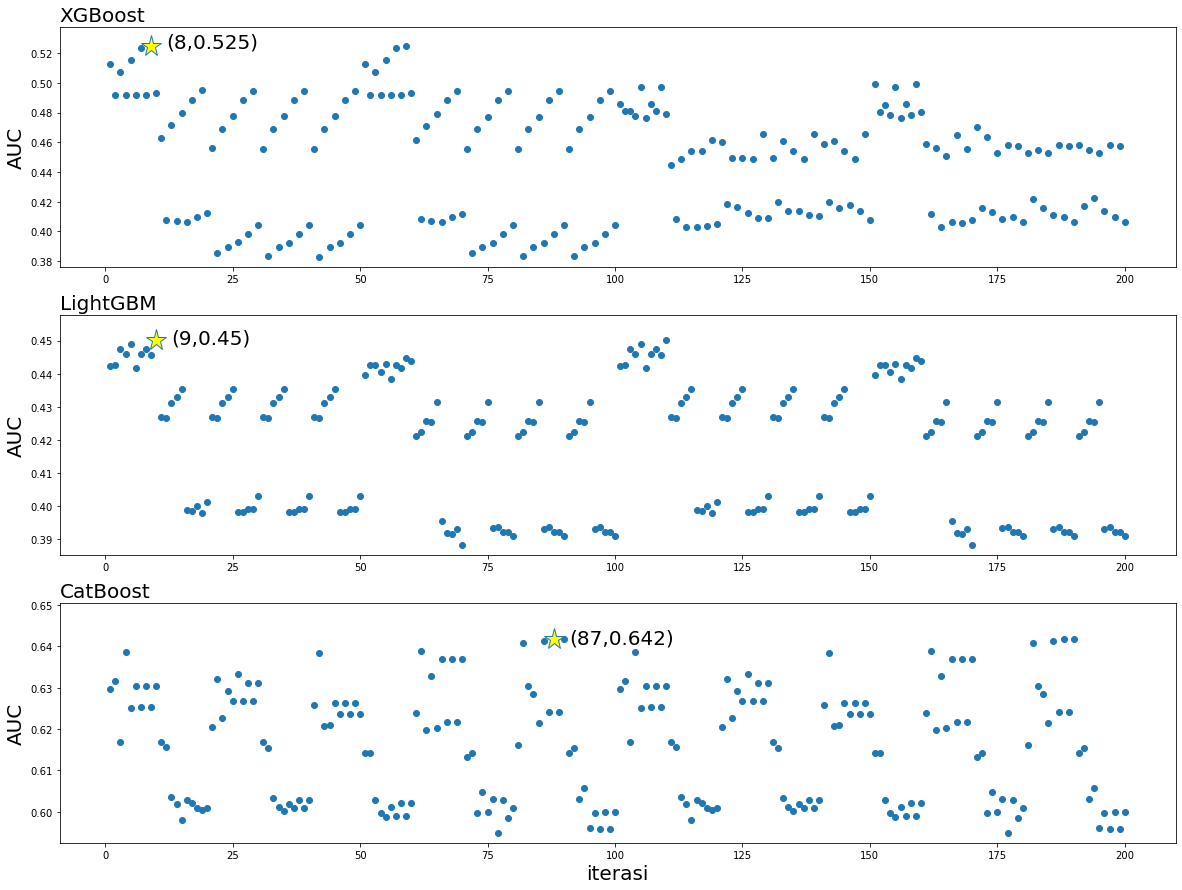

In [10]:
dataviz.scatter_subplot(x,y_list,x_label,y_label,best_indexes,titles)

## Visualization 4
- dataset 1 
- compare exec time of grid search in each GBDT

In [16]:
x = ["xgboost","lightgbm","catboost"]
y=[result.exp_2.exec_time,result.exp_7.exec_time,result.exp_12.exec_time]

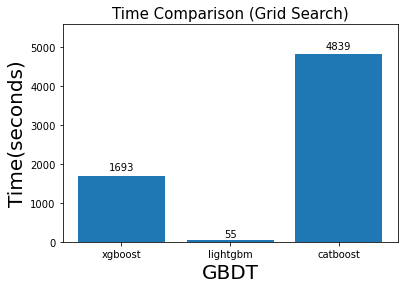

In [17]:
dataviz.bar_chart(x,y,"GBDT","Time(seconds)","Time Comparison (Grid Search)",'%.0f',[1.05,1.05,1.01])

## Visualization 6
- dataset 1
- menunjukkan adanya konvergensi untuk bayes search, sedangkan random search tidak ada. (untuk tiap GBDT)
- cukup tunjukkan 1 seed saja untuk tiap GBDT. Untuk hasil dari semua seed bisa ditunjukkan di lampiran 

In [27]:
x=range(1,200+1)

seeds=[1,12,22,32,42,52,62,72,82,92]
seed_index=0 # index dari seed yang dipilih  

# [rs,bs]
xgboost_all_auc=[result.exp_3.auc_all_each_seed[seed_index],result.exp_4.auc_all_each_seed[seed_index]]
lightgbm_all_auc=[result.exp_8.auc_all_each_seed[seed_index],result.exp_9.auc_all_each_seed[seed_index]]
catboost_all_auc=[result.exp_13.auc_all_each_seed[seed_index],result.exp_14.auc_all_each_seed[seed_index]]

y_list=[xgboost_all_auc,lightgbm_all_auc,catboost_all_auc]

# [rs,bs]
xgboost_best_indexes=[result.exp_3.auc_best_index_each_seed[seed_index],result.exp_4.auc_best_index_each_seed[seed_index]]
lightgbm_best_indexes=[result.exp_8.auc_best_index_each_seed[seed_index],result.exp_9.auc_best_index_each_seed[seed_index]]
catboost_best_indexes=[result.exp_13.auc_best_index_each_seed[seed_index],result.exp_14.auc_best_index_each_seed[seed_index]]

best_indexes=[xgboost_best_indexes,lightgbm_best_indexes,catboost_best_indexes]

seed=seeds[seed_index]
titles=["XGBoost(seed={0})".format(seed),"LightGBM(seed={0})".format(seed),"CatBoost(seed={0})".format(seed)]

x_label="iterasi"
y_label="AUC"

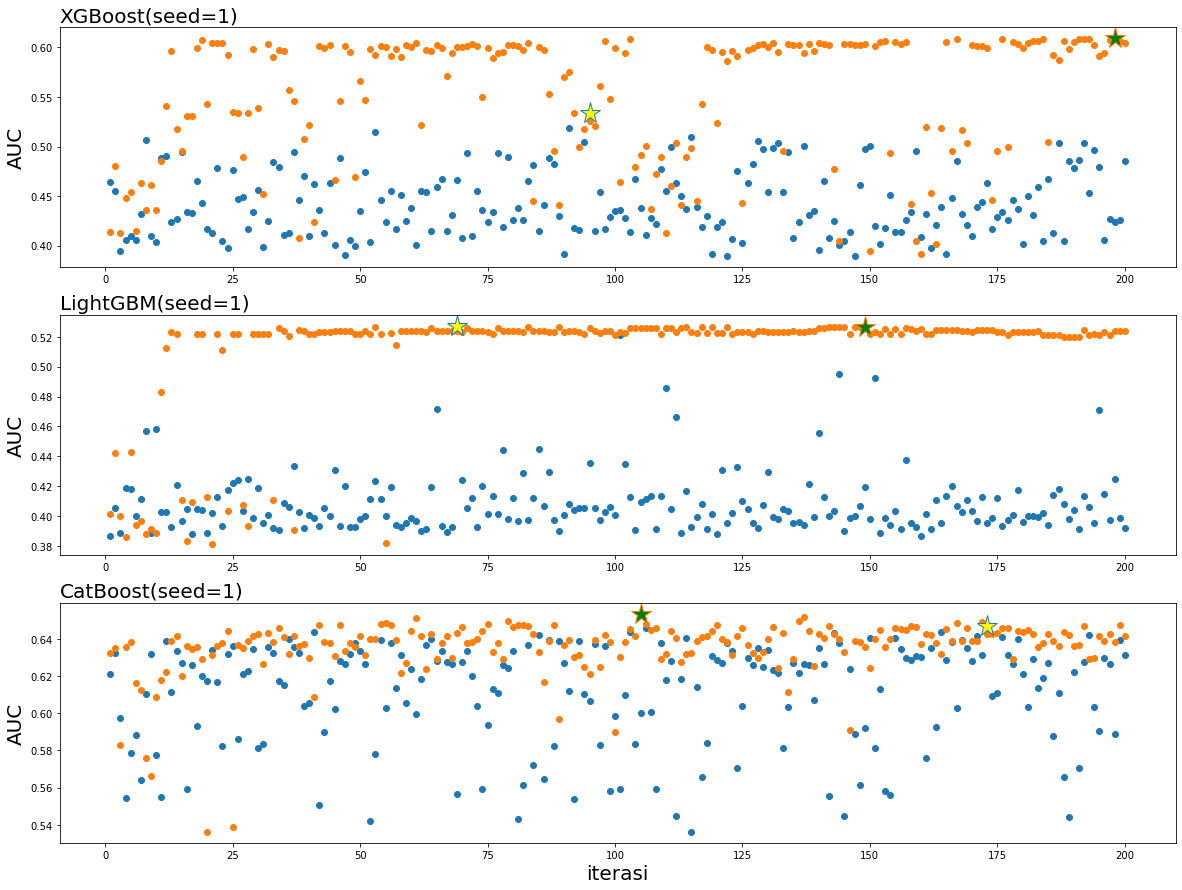

In [28]:
dataviz.scatter_subplot_2(x,y_list,x_label,y_label,best_indexes,titles)

In [ ]:
### 